In [1]:
from parsing import *
from database_functions import *
from ml_functions import *

In [2]:
data_raw_fname = '/Users/jenniferpolson/Documents/School/2017-F/BE 223A/Final Project/Functionalize/be223a_dataset_full.csv'
encoding="ISO-8859-1"
dtformat='%Y-%m-%d %H:%M:%S'
patients, appointments, weather = parsing(data_raw_fname, encoding, dtformat, 
                                          exam_id = 'examId', pt_id = 'patient_deid', age = 'AgeAtExam', gender = 'Gender')

Reading /Users/jenniferpolson/Documents/School/2017-F/BE 223A/Final Project/Functionalize/be223a_dataset_full.csv
Processed in 6.924 seconds.


In [3]:
data_raw_fname = '/Users/jenniferpolson/Documents/School/2017-F/BE 223A/Midterm Project/be223a_dataset.csv'
encoding=None
dtformat='%m/%d/%y %H:%M'
patients_s, appointments_s, weather_s = parsing(data_raw_fname, encoding, dtformat, 
                                          exam_id = 'Exam ID', pt_id = 'Patient ID', age = 'Age', gender = 'Gender')

Reading /Users/jenniferpolson/Documents/School/2017-F/BE 223A/Midterm Project/be223a_dataset.csv
Processed in 3.574 seconds.


In [4]:
patients=patients.rename(columns = {'patient_deid':'Patient_ID'})
appointments=appointments.rename(columns = {'examId':'Exam_ID', 'patient_deid':'Patient_ID'})

In [5]:
#Input Parameters
dbname = "223ADB3_v.db"
patient_key = "Patient_ID"
appointment_key = "Exam_ID"
weather_key = "Dayofyear"

In [6]:
connection = new_connection(dbname)

In [7]:
#Generating SQL Strings
patients_string=generate_string("patients", patients , patient_key, [])
appointments_string=generate_string("appointments", appointments, appointment_key, [patient_key, weather_key])
weather_string=generate_string("weather", weather, "Dayofyear", [])

In [8]:
# Creating tables

create_table(dbname, patients_string)
create_table(dbname, appointments_string)
create_table(dbname, weather_string)

In [9]:
# Creating foreign keys

fkey1=foreignkey("appointments", patient_key, "patients", patient_key)
fkey2=foreignkey("appointments", weather_key, "weather", weather_key)


# Creating foreign key columns
#create_key(dbname, fkey1)
#create_key(dbname, fkey2)

In [10]:
# Push dataframe into database

push_dataframe(patients,dbname, "patients")
push_dataframe(appointments, dbname, "appointments")
push_dataframe(weather,dbname, "weather")

In [11]:
#other function: pull from DB, rearrange to data output
patients = query_data(dbname, "SELECT * from patients") 
appointments = query_data(dbname, "SELECT * from appointments")
weather = query_data(dbname, "SELECT * from weather")

In [12]:
df1 = create_df(appointments, patients, weather, 'Patient_ID', 'Dayofyear').drop('index', axis = 1)

In [13]:
appointments_s

,Exam_ID,Patient_ID,OrgCode,Modality,Anatomy,SubSpecialty,Datetime Obj,Dayofyear,ICD_Group,Label,Timeofday,Weekday
0,8637381,0000219e4b37d2504fb6b8c28e24a2d4,SMWG,US,LWREXT,US,2046-11-27 13:00:00,331.0,musculoskeletal,0,PM,1.0
1,8596175,0000a7ddc7607d1d8ee5c47dd437034e,MP,CR,CHEST,CHEST,2046-11-01 14:10:00,305.0,circulatory,0,PM,3.0
2,8756880,0000e1b68421441f1bb8e697ecdad119,SMWG,MG,LTBREAST,BREAST,NaT,365.0,nan,0,OFF,NaN
3,8655662,00028fae880618d73d2dcfa3e5bc670b,SMWG,MG,BREAST,BREAST,2046-12-06 09:40:00,340.0,nan,0,AM,3.0
4,8655670,00028fae880618d73d2dcfa3e5bc670b,SMWG,MG,BREAST,BREAST,2046-12-06 09:45:00,340.0,nan,0,AM,3.0
5,8790094,0002aac1c9addac1d4ee6902d6ec5404,SMWG,MG,BREAST,BREAST,2047-03-12 10:50:00,71.0,nan,0,AM,1.0
6,8621143,0004fb840f61b62300e85fff9d5d5507,SMO,CR,HANDS,MUSCL,2046-11-15 17:00:00,319.0,musculoskeletal,0,OFF,3.0
7,8065344,0005bf180d7043a1959152398505d12b,RICP,CR,FOREARM,MUSCL,2046-01-06 00:00:00,6.0,nan,0,OFF,5.0
8,8176413,00069bac527f81cc1fd8f6a1d6ab8ec0,MP,MR,BRAIN,NEURO,NaT,365.0,neoplasms,0,OFF,NaN
9,8607837,0006ff704be72d3514db32fcbbcb5885,MP1,MR,BRAIN,HEAD_NECK,2046-11-08 12:00:00,312.0,supplemental,0,PM,3.0


Preprocessing Completed in 100.963 seconds.
GridSearch was not run. Default parameters selected:
- Class Weight: balanced
- Criterion: entropy
- Maximum Features: 0.8
- Number of Estimators: 50
Running the Random Forest Classifier.
Feature ranking:


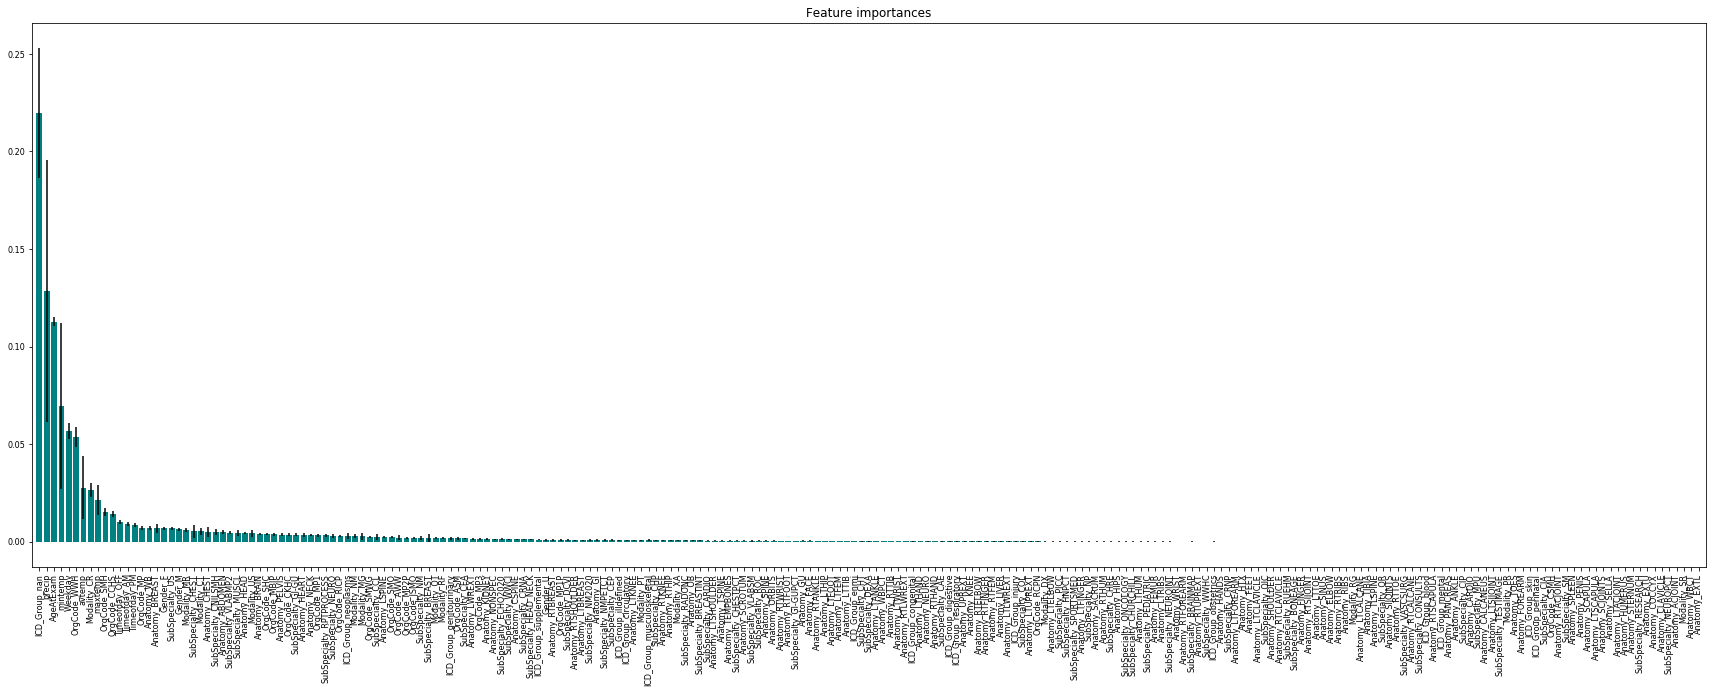

['Weekday', 'AgeAtExam', 'mintemp', 'maxtemp', 'avtemp', 'precip', 'OrgCode_ASM', 'OrgCode_AWW', 'OrgCode_CCHS', 'OrgCode_CKHC', 'OrgCode_CSMH', 'OrgCode_JSMO', 'OrgCode_MBIP', 'OrgCode_MP', 'OrgCode_MP1', 'OrgCode_MP1P', 'OrgCode_MP2P', 'OrgCode_MP3', 'OrgCode_RCPN', 'OrgCode_RICP', 'OrgCode_SHC', 'OrgCode_SMH', 'OrgCode_SMO', 'OrgCode_SMWG', 'OrgCode_WWH', 'Modality_CR', 'Modality_CT', 'Modality_DX', 'Modality_MG', 'Modality_MR', 'Modality_NM', 'Modality_OT', 'Modality_PR', 'Modality_PT', 'Modality_RF', 'Modality_RG', 'Modality_SR', 'Modality_US', 'Modality_XA', 'Anatomy_ABDOMEN', 'Anatomy_ACJOINT', 'Anatomy_ANKLE', 'Anatomy_BRAIN', 'Anatomy_BREAST', 'Anatomy_CALCANEUS', 'Anatomy_CARDIO', 'Anatomy_CHEST', 'Anatomy_CLAVICLE', 'Anatomy_COCCYX', 'Anatomy_CSPINE', 'Anatomy_ELBOW', 'Anatomy_EXTL', 'Anatomy_EXTU', 'Anatomy_FACE', 'Anatomy_FEET', 'Anatomy_FEMUR', 'Anatomy_FINGER', 'Anatomy_FOREARM', 'Anatomy_GI', 'Anatomy_GU', 'Anatomy_HANDS', 'Anatomy_HEAD', 'Anatomy_HEART', 'Anatomy_HIPS'

Random Forest Classifier Model run in 126.133 seconds.


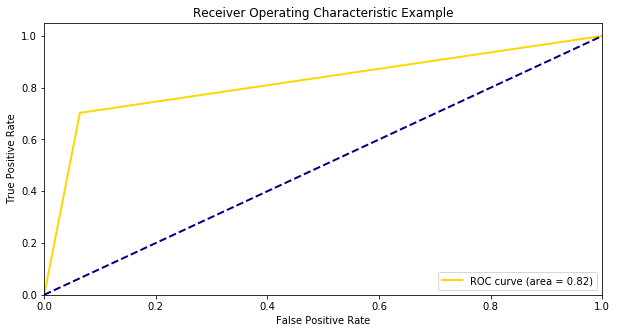

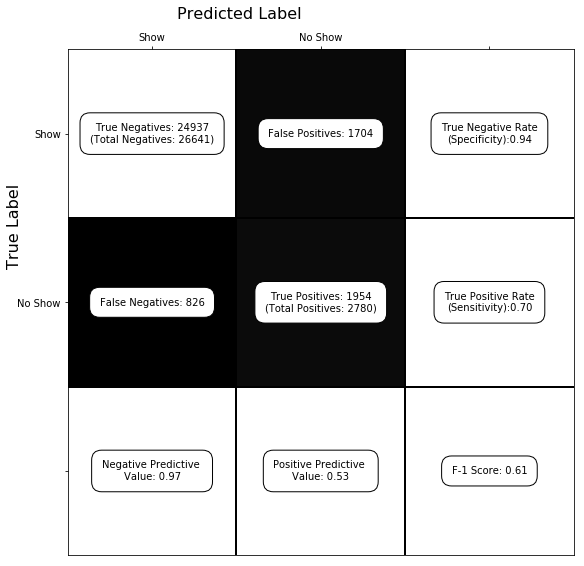

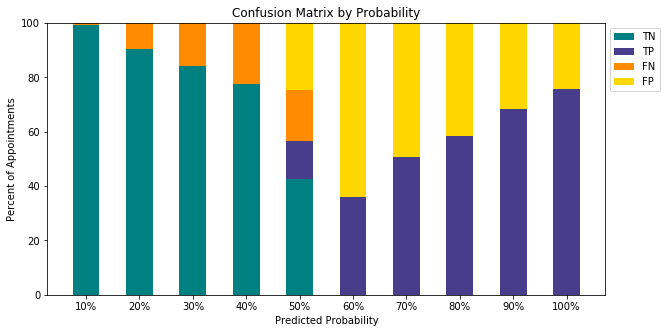

Model Analysis processed in 0.816 seconds.
Pipeline completed in 232.621 seconds.


In [14]:
#run ML
results, results_v, test, validate_e, prob, groups, evalstats, sort_features = run_model(df1, appointments_s, k = 5000, tune_parameters = False)

In [15]:
#create new table - test results
results_string = generate_string ('results', results, 'Patient_ID', []) #patient ID
create_table(dbname, results_string)

#push the data to the table
push_dataframe(results,dbname, 'results')

In [16]:
#create new table - test results
results_v_string = generate_string ('vresults', results_v, 'Patient_ID', []) #patient ID
create_table(dbname, results_v_string)

#push the data to the table
push_dataframe(results_v,dbname, 'vresults')

In [17]:
#circular - to make sure it actually worked
#results = query_data(dbname, "SELECT * from results") 